## EE 782: Advanced Topics in Machine Learning
### **Assignment 2:** Metric Learning & Generative AI
> **NAME:** Munish Monga

> **ROLL NO:** 22M2153

> [Github Repo Link](https://github.com/munish30monga/Metric_Learning-Generative_AI)

### Table of Contents:
- [Introduction](#introduction)
- [Importing Libraries](#importing-libraries)
- [Hyperparameters](#hyperparameters)
- [References](#references)

### Introduction <a id="introduction"></a>
**PART A: Metric Learning using Siamese Network**
> We have to train a Siamese Network on Labeled Faces in the Wild (LFW) Dataset


**PART B: Generative AI using GANs**
> We have to train a generative model for generating face images, using a GAN.

### Importing Libraries <a id="importing-libraries"></a>

In [25]:
import pathlib as pl                                            # for path handling
import matplotlib.pyplot as plt                                 # for plotting
from PIL import Image                                           # for image handling

### Hyperparameters <a id="hyperparameters"></a>

## **PART A:** Metric Learning using Siamese Network <a id="part-a"></a>
### Downloading Dataset
> <font color="gray">Q1. Download labeled faces in the wild (LFW) dataset</font>

LFW Dataset was downloaded and extracted into the following path: `./dataset/lfw/`

### Exploring Dataset <a id="exploring-dataset"></a>

In [17]:
data_dir = pl.Path('./dataset/lfw/')     # Setting path to the data directory
persons_dirs = [d for d in data_dir.iterdir() if d.is_dir()] # List all subdirectories (each directory corresponds to a person)
persons_dict = {person_dir.name: len(list(person_dir.glob("*.jpg"))) for person_dir in persons_dirs} # Create a dictionary of all persons and the number of images they have

In [30]:
print(f"Total number of persons: {len(persons_dict)}")  # Print the number of persons
for i, (person, num_images) in enumerate(persons_dict.items()):  # Loop through all persons dictionary
    if i >= 10:                     # Break the loop after printing 10 persons
        break
    print(f"{i+1}.{person}: {num_images}")  # Print the number of images for each person

Total number of persons: 5749
1.Demi_Moore: 4
2.Glen_Sather: 1
3.Carlos_De_Abreu: 1
4.Stacy_Dragila: 2
5.Donald_Keyser: 1
6.Megan_Mullally: 3
7.Roh_Moo-hyun: 32
8.Barbora_Strycova: 1
9.Peter_Camejo: 1
10.Bryan_Thomas: 1


> <font color="gray">Q2. Get the number of persons who have more than one image</font>

In [31]:
persons_with_mul_imgs_dict = {person: num_images for person, num_images in persons_dict.items() if num_images > 1}
print(f"Number of persons with more than one image: {len(persons_with_mul_imgs_dict)}")
for i, (person, num_images) in enumerate(persons_with_mul_imgs_dict.items()):
    if i >= 10:
        break
    print(f"{i+1}.{person}: {num_images}")

Number of persons with more than one image: 1680
1.Demi_Moore: 4
2.Stacy_Dragila: 2
3.Megan_Mullally: 3
4.Roh_Moo-hyun: 32
5.Erin_Runnion: 4
6.Diana_Taurasi: 2
7.Vaclav_Havel: 9
8.Tom_Watson: 3
9.John_Mayer: 3
10.Raghad_Saddam_Hussein: 2


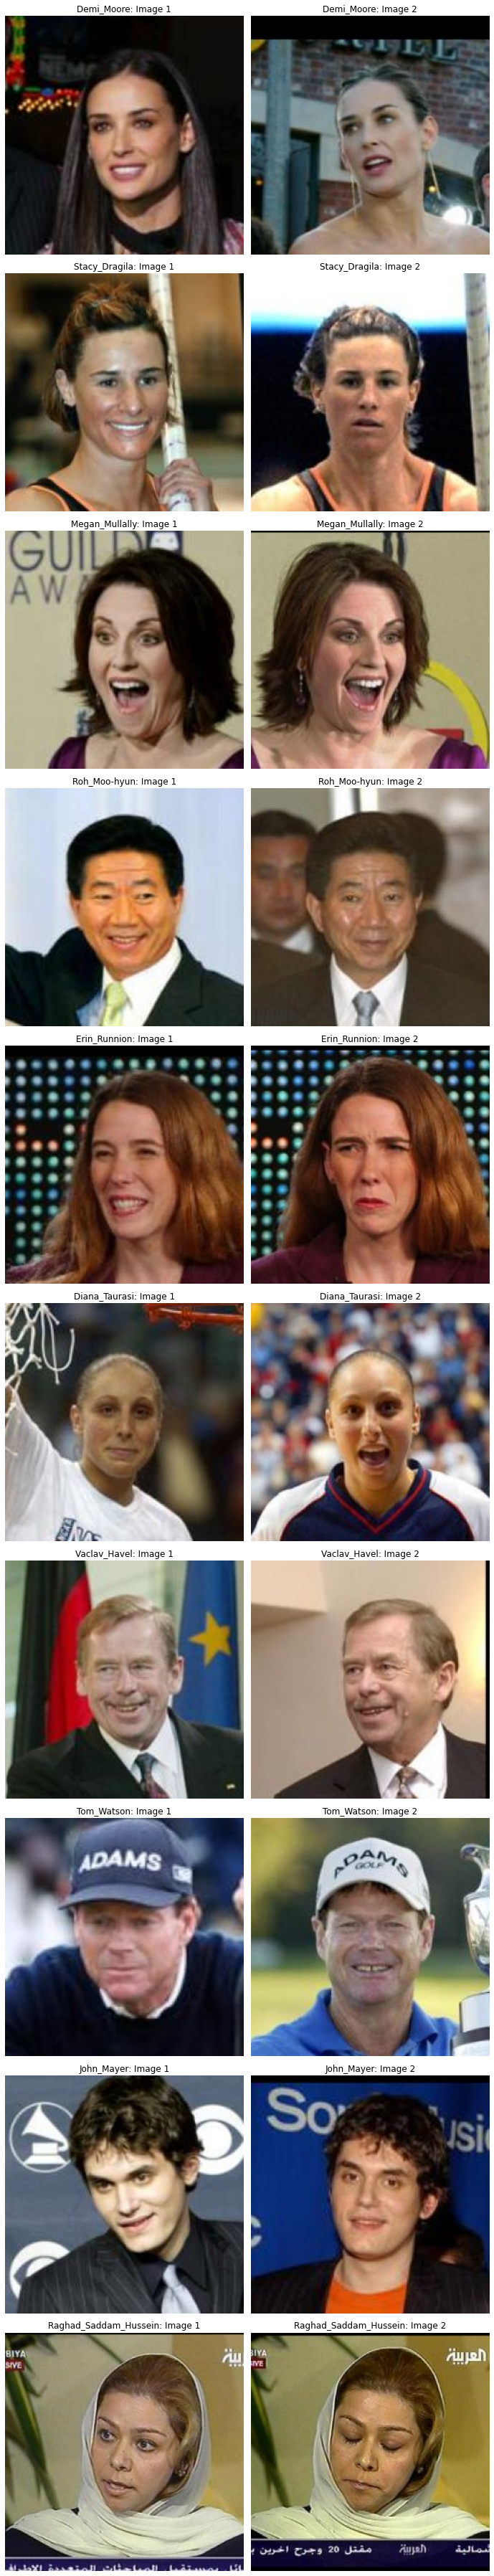

In [33]:
def visualize(num_persons, persons_with_multiple_images, data_dir):
    """
    Visualizes a grid of persons with multiple images.
    """
    fig, axes = plt.subplots(num_persons, 2, figsize=(10, 5*num_persons))
    
    for idx, (person, count) in enumerate(persons_with_multiple_images.items()):
        if idx >= num_persons:
            break
        person_dir = data_dir / person
        images = list(person_dir.glob("*.jpg"))
        for j, img_path in enumerate(images[:2]):  # Displaying first two images of each person
            image = Image.open(img_path)
            axes[idx, j].imshow(image)
            axes[idx, j].axis('off')
            axes[idx, j].set_title(f"{person}: Image {j+1}")

    plt.tight_layout()
    plt.show()
    
visualize(10, persons_with_mul_imgs_dict, data_dir)

### Train-Test Split <a id="train-test-split"></a>
> <font color="gray">Q3. Split into training, validation, and testing by person (not by image)</font>

### References:   <a id="references"></a>
1.  https://github.com/Mitix-EPI/Face-Recognition-using-Siamese-Networks/tree/main
2.  https://chat.openai.com
3.  